In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Clustering Colors from an Image

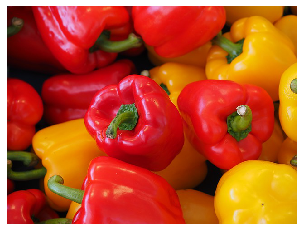

In [5]:
# load image
img = plt.imread('peppers.jpg')
#img = plt.imread('rose2.jfif')
plt.imshow(img) #show image
plt.axis('off');


The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has. Below you can play with different combinations of RGB to create different colors. In total, you can create $256^3 = 16,777,216$ unique colors.

img_flat = img.reshape(img.shape[0]*img.shape[1],3)
print(img_flat.shape)
img_flat[:5,:]
img_flat.shape

In [18]:
# Question1 Apply k-means Algorithm

from sklearn.cluster import KMeans

img_flat = img.reshape(img.shape[0]*img.shape[1],3)

kmeans = KMeans(n_clusters=2)
kmeans.fit(img_flat)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

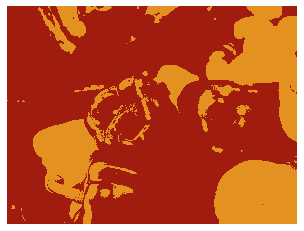

In [16]:
#Question 2
# loops for each cluster center
#replace kmeans.labels_ with kmeans.cluster_centers_[i]
img_flat2 = img_flat.copy()

for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
    

plt.imshow(img_flat2.reshape(img.shape)) #show image
plt.axis('off');

#Question 3 Apply elbow method

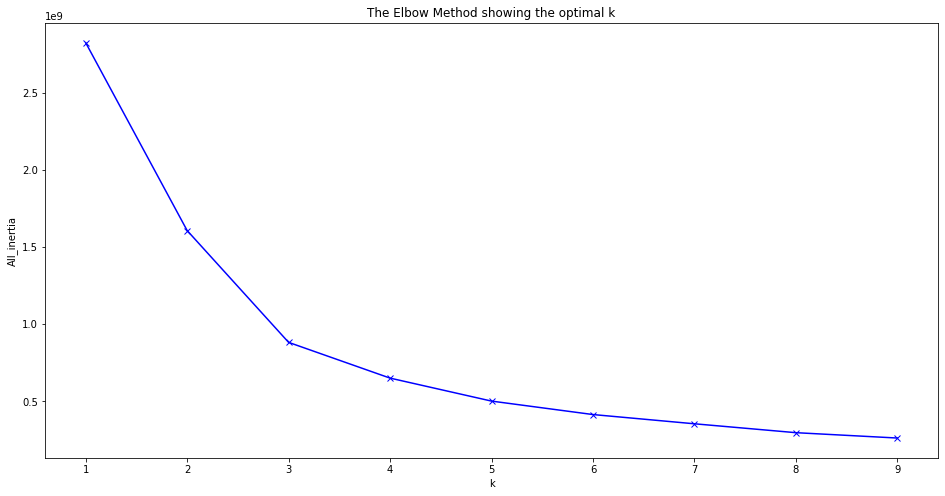

In [19]:
all_inertia = []
K = range(1,10)
for i in K:
    kmeanModel = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeanModel.fit(img_flat)
    all_inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, all_inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('All_inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [25]:
# 3 looks like it the best
